In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import prince
import mca

df=pd.read_csv('C:/Users/H.A/Downloads/CleanCreditScoring.csv')
df.head()


,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,...,timeR,ageR,expensesR,incomeR,assetsR,debtR,amountR,priceR,finratR,savingsR
0,good,9,rent,60,30,married,no_rec,freelance,73,129,...,"time (48,99]","age (25,30]","exp (60,80]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (600,900]","priz (0,1e+03]","finr (90,100]","sav (4,6]"
1,good,17,rent,60,58,widow,no_rec,fixed,48,131,...,"time (48,99]","age (50,99]","exp (40,50]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (900,1.1e+03]","priz (1.5e+03,1.8e+03]","finr (50,70]","sav (4,6]"
2,bad,10,owner,36,46,married,yes_rec,freelance,90,200,...,"time (24,36]","age (40,50]","exp (80,1e+04]","inc (190,1e+04]","asset (0,3e+03]","debt (-1,0]","am (1.4e+03,1e+05]","priz (1.8e+03,1e+05]","finr (50,70]","sav (0,2]"
3,good,0,rent,60,24,single,no_rec,fixed,63,182,...,"time (48,99]","age (0,25]","exp (60,80]","inc (140,190]","asset (0,3e+03]","debt (-1,0]","am (600,900]","priz (1.3e+03,1.5e+03]","finr (50,70]","sav (6,99]"
4,good,0,rent,36,26,single,no_rec,fixed,46,107,...,"time (24,36]","age (25,30]","exp (40,50]","inc (80,110]","asset (-1,0]","debt (-1,0]","am (0,600]","priz (0,1e+03]","finr (0,50]","sav (6,99]"


In [2]:
df.describe()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
count,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000
mean,7.991453,46.453441,37.084121,55.601439,140.629780,5354.948943,342.257085,1038.763383,1462.480432,72.616409,3.860083
std,8.176370,14.647979,10.986366,19.520839,80.177896,11534.328183,1244.694549,474.747952,628.555171,20.390595,3.726292
min,0.000000,6.000000,18.000000,35.000000,1.000000,0.000000,0.000000,100.000000,105.000000,6.702413,-8.160000
25%,2.000000,36.000000,28.000000,35.000000,90.000000,0.000000,0.000000,700.000000,1116.250000,60.030020,1.615385
50%,5.000000,48.000000,36.000000,51.000000,124.000000,3000.000000,0.000000,1000.000000,1400.000000,77.096757,3.120000
75%,12.000000,60.000000,45.000000,72.000000,170.000000,6000.000000,0.000000,1300.000000,1691.500000,88.460263,5.195688
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000,100.000000,33.250000


In [3]:
print("the mean is",df['Amount'].mean())
print("the max is",df['Amount'].max())
print("the min is",df['Amount'].min())
print("the median is",df['Amount'].median())
print("the variance is",df['Amount'].var())
print("the Standard deviation is",df['Amount'].std())

the mean is 1038.7633828160144
the max is 5000
the min is 100
the median is 1000.0
the variance is 225385.61779048378
the Standard deviation is 474.7479518549646


In [4]:
print("the mean is",df['Income'].mean())
print("the max is",df['Income'].max())
print("the min is",df['Income'].min())
print("the median is",df['Income'].median())
print("the variance is",df['Income'].var())
print("the Standard deviation is",df['Income'].std())

the mean is 140.62977957714799
the max is 959
the min is 1
the median is 124.0
the variance is 6428.495076981756
the Standard deviation is 80.17789643649773


In [5]:
np.corrcoef(df['Amount'], df['Income'])
#"cor=0.19082011 < 1 => Amount and Income are not on strong positive relationship"

array([[1.        , 0.19082011],
       [0.19082011, 1.        ]])

In [6]:
Amount = df[['Amount']]
Income = df[['Income']]

model = LinearRegression().fit(Income,Amount) #Create a model and fit it
r_sq = model.score(Income, Amount)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coef:', model.coef_)
print(" Amount =",model.coef_,"* Income+",model.intercept_)

coefficient of determination: 0.036412315441911036
intercept: [879.86850909]
coef: [[1.1298807]]
 Amount = [[1.1298807]] * Income+ [879.86850909]


In [7]:
features = ['Seniority','Time','Age','Expenses','Income','Assets','Debt','Amount','Price','Finrat','Savings']
# extracting out the features
x = df.loc[:, features].values
x_standardized = StandardScaler().fit_transform(x)
x_standardized

array([[ 0.12336287,  0.92491136, -0.64488271, ..., -0.98090001,
         1.0764133 ,  0.09123144],
       [ 1.10190227,  0.92491136,  1.90401744, ...,  0.31109689,
        -0.6034234 ,  0.30057838],
       [ 0.2456803 , -0.71372418,  0.81163166, ...,  2.42252532,
        -0.27538999, -0.50460215],
       ...,
       [-0.97749395, -1.53304195, -0.00765768, ..., -0.79473789,
        -1.01505902, -0.64953465],
       [-0.97749395,  0.10559359, -1.28210775, ..., -1.45187425,
         1.34310311,  1.09551117],
       [-0.36590683,  0.92491136, -0.46281842, ...,  0.29836786,
         0.45132611, -0.20101927]])

In [8]:
cov_data = np.corrcoef(x.T)
cov_data

array([[ 1.        , -0.02187363,  0.50608874,  0.12568047,  0.12122411,
         0.12424073, -0.01934661, -0.00763935,  0.04112198, -0.07339167,
         0.09324557],
       [-0.02187363,  1.        , -0.05184996, -0.00171714, -0.02991524,
        -0.0830177 ,  0.05826747,  0.43085832,  0.12967683,  0.46864134,
         0.10165326],
       [ 0.50608874, -0.05184996,  1.        ,  0.24813694,  0.14755649,
         0.18098586, -0.04618789,  0.02903078,  0.04868519, -0.03451424,
         0.06203607],
       [ 0.12568047, -0.00171714,  0.24813694,  1.        ,  0.25500519,
         0.01893457,  0.01477083,  0.04953912,  0.04072803,  0.02458219,
        -0.03809391],
       [ 0.12122411, -0.02991524,  0.14755649,  0.25500519,  1.        ,
         0.21911198,  0.14469675,  0.19082011,  0.21778928, -0.00340719,
         0.71796297],
       [ 0.12424073, -0.0830177 ,  0.18098586,  0.01893457,  0.21911198,
         1.        ,  0.19161949,  0.14428376,  0.19489363, -0.02505999,
         0.067

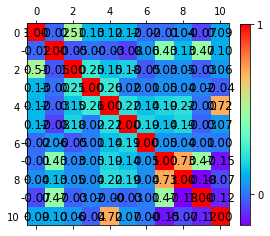

In [9]:
img = plt.matshow(cov_data, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=12, color='black', ha="center", va="center")
        
plt.show()

In [10]:
pca = PCA(n_components=2)
principal_components=pca.fit_transform(x_standardized)
principalDF=pd.DataFrame(data=principal_components, columns= ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDF, df[['Status']]], axis = 1)
finalDf

,principal component 1,principal component 2,Status
0,-0.340293,-0.606274,good
1,0.606546,0.809877,good
2,2.527355,0.084336,bad
3,-0.079699,-0.187411,good
4,-2.476189,0.996887,good
...,...,...,...
4441,-0.521401,-1.124151,bad
4442,0.065632,-0.103486,good
4443,-2.211913,0.627329,bad
4444,-1.332523,-0.519819,good


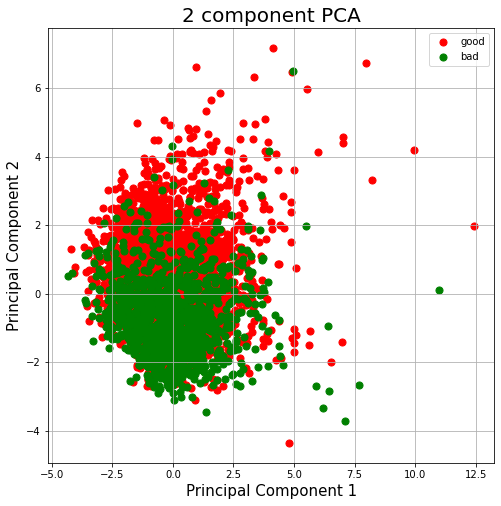

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['good', 'bad']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Status'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [13]:

featuresMC= ['Status','Home','Marital','Records','Job','seniorityR','timeR','ageR','expensesR','incomeR','assetsR','debtR','amountR','priceR','finratR','savingsR']

Y = df.loc[:, featuresMC].values
mca = prince.MCA(n_components=2, n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
mca = mca.fit(Y)
mca


TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.